## Libraries

Do not import any additional libraries

In [ ]:
%matplotlib inline
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import torch.nn.functional as F

## Download dataset and create a data loader
PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.

PyTorch offers domain-specific libraries such as [TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and [TorchAudio](https://pytorch.org/audio/stable/index.html),
all of which include datasets. For this assignment, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like
CIFAR, COCO, MNIST ([full list here](https://pytorch.org/vision/stable/datasets.html)). In this tutorial, we
use the CIFAR10 dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.

We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element
in the dataloader iterable will return a batch of 64 features and labels.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

#download training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

#download test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Creating Models
To define a neural network in PyTorch, we create a class that inherits
from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). We define the layers of the network
in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate
operations in the neural network, we move it to the GPU if available.



In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define a CNN model with following layers: input > Conv > Pool > Conv > Pool > Linear > Output
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, padding='same')
        self.conv2 = nn.Conv2d(16, 32, 5, padding='same')
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*8*8,512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), 1)
        return x

model = CNN().to(device)
print(model)

Using cuda device
CNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
# Define dense NN model with 0 hidden layers
class NN0(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32,10)

    def forward(self, x):

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.log_softmax(self.fc1(x), 1)
        return x

model0 = NN0().to(device)
print(model0)

NN0(
  (fc1): Linear(in_features=3072, out_features=10, bias=True)
)


In [ ]:
# Define dense NN model with 1 hidden layers
class NN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32,512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), 1)
        return x

model1 = NN1().to(device)
print(model1)

NN1(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
# Define dense NN model with 2 hidden layers
class NN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32,512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), 1)
        return x

model2 = NN2().to(device)
print(model2)

NN2(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
# Define dense NN model with 3 hidden layers
class NN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32,512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), 1)
        return x

model3 = NN3().to(device)
print(model3)

NN3(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=10, bias=True)
)


## Optimizing the Model Parameters
To train a model, we need a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
and an [optimizer](https://pytorch.org/docs/stable/optim.html).



In [ ]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer
optimizer = torch.optim.Adam(model.parameters())
optimizer0 = torch.optim.Adam(model0.parameters())
optimizer1 = torch.optim.Adam(model1.parameters())
optimizer2 = torch.optim.Adam(model2.parameters())
optimizer3 = torch.optim.Adam(model3.parameters())

## Training function

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and
backpropagates the prediction error to adjust the model's parameters.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss

## Testing function

We also check the model's performance against the test dataset to ensure it is learning.



In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    average_test_loss = test_loss / num_batches
    accuracy = correct / size
    return accuracy, average_test_loss

## Training process

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns
parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.



In [ ]:
epochs = 10
all_train_accuracies = []
all_test_accuracies = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model, loss_fn, optimizer)
    all_train_accuracies += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model, loss_fn)
    all_test_accuracies += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:23<03:33, 23.67s/it]

Epoch 1:	 Train accuracy: 50.7%	 Avg train loss: 1.372779	 Test accuracy: 59.9%	 Avg test loss: 1.112871


 20%|██        | 2/10 [00:38<02:30, 18.75s/it]

Epoch 2:	 Train accuracy: 65.2%	 Avg train loss: 0.983125	 Test accuracy: 66.9%	 Avg test loss: 0.930434


 30%|███       | 3/10 [00:54<01:59, 17.09s/it]

Epoch 3:	 Train accuracy: 71.9%	 Avg train loss: 0.802540	 Test accuracy: 68.8%	 Avg test loss: 0.901207


 40%|████      | 4/10 [01:09<01:37, 16.32s/it]

Epoch 4:	 Train accuracy: 77.0%	 Avg train loss: 0.654578	 Test accuracy: 69.2%	 Avg test loss: 0.914488


 50%|█████     | 5/10 [01:24<01:19, 15.95s/it]

Epoch 5:	 Train accuracy: 82.0%	 Avg train loss: 0.515988	 Test accuracy: 70.2%	 Avg test loss: 0.907510


 60%|██████    | 6/10 [01:40<01:03, 15.96s/it]

Epoch 6:	 Train accuracy: 86.6%	 Avg train loss: 0.381029	 Test accuracy: 71.6%	 Avg test loss: 0.967814


 70%|███████   | 7/10 [01:55<00:46, 15.62s/it]

Epoch 7:	 Train accuracy: 90.8%	 Avg train loss: 0.266055	 Test accuracy: 71.2%	 Avg test loss: 1.091334


 80%|████████  | 8/10 [02:10<00:30, 15.39s/it]

Epoch 8:	 Train accuracy: 93.6%	 Avg train loss: 0.182011	 Test accuracy: 70.5%	 Avg test loss: 1.199631


 90%|█████████ | 9/10 [02:25<00:15, 15.26s/it]

Epoch 9:	 Train accuracy: 95.7%	 Avg train loss: 0.129475	 Test accuracy: 71.2%	 Avg test loss: 1.324573


100%|██████████| 10/10 [02:40<00:00, 16.03s/it]

Epoch 10:	 Train accuracy: 96.6%	 Avg train loss: 0.098455	 Test accuracy: 69.9%	 Avg test loss: 1.559588


In [ ]:
epochs = 10
all_train_accuracies_0 = []
all_test_accuracies_0 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model0, loss_fn, optimizer0)
    all_train_accuracies_0 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model0, loss_fn)
    all_test_accuracies_0 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:14<02:10, 14.48s/it]

Epoch 1:	 Train accuracy: 36.3%	 Avg train loss: 1.856937	 Test accuracy: 38.7%	 Avg test loss: 1.797540


 20%|██        | 2/10 [00:28<01:54, 14.32s/it]

Epoch 2:	 Train accuracy: 38.5%	 Avg train loss: 1.797785	 Test accuracy: 38.0%	 Avg test loss: 1.816368


 30%|███       | 3/10 [00:42<01:38, 14.10s/it]

Epoch 3:	 Train accuracy: 39.3%	 Avg train loss: 1.774984	 Test accuracy: 39.1%	 Avg test loss: 1.790477


 40%|████      | 4/10 [00:56<01:23, 13.93s/it]

Epoch 4:	 Train accuracy: 39.7%	 Avg train loss: 1.765337	 Test accuracy: 39.4%	 Avg test loss: 1.785996


 50%|█████     | 5/10 [01:10<01:09, 13.94s/it]

Epoch 5:	 Train accuracy: 40.4%	 Avg train loss: 1.750841	 Test accuracy: 39.0%	 Avg test loss: 1.810816


 60%|██████    | 6/10 [01:25<00:57, 14.25s/it]

Epoch 6:	 Train accuracy: 40.5%	 Avg train loss: 1.743937	 Test accuracy: 38.1%	 Avg test loss: 1.804092


 70%|███████   | 7/10 [01:39<00:42, 14.18s/it]

Epoch 7:	 Train accuracy: 40.5%	 Avg train loss: 1.740692	 Test accuracy: 39.0%	 Avg test loss: 1.796654


 80%|████████  | 8/10 [01:52<00:27, 13.97s/it]

Epoch 8:	 Train accuracy: 40.9%	 Avg train loss: 1.737314	 Test accuracy: 38.6%	 Avg test loss: 1.803617


 90%|█████████ | 9/10 [02:06<00:14, 14.02s/it]

Epoch 9:	 Train accuracy: 40.8%	 Avg train loss: 1.734747	 Test accuracy: 37.5%	 Avg test loss: 1.832887


100%|██████████| 10/10 [02:21<00:00, 14.14s/it]

Epoch 10:	 Train accuracy: 41.1%	 Avg train loss: 1.725851	 Test accuracy: 38.1%	 Avg test loss: 1.805173


In [ ]:
epochs = 10
all_train_accuracies_1 = []
all_test_accuracies_1 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model1, loss_fn, optimizer1)
    all_train_accuracies_1 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model1, loss_fn)
    all_test_accuracies_1 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:14<02:09, 14.39s/it]

Epoch 1:	 Train accuracy: 42.0%	 Avg train loss: 1.663624	 Test accuracy: 47.4%	 Avg test loss: 1.523728


 20%|██        | 2/10 [00:28<01:54, 14.26s/it]

Epoch 2:	 Train accuracy: 48.9%	 Avg train loss: 1.469916	 Test accuracy: 48.4%	 Avg test loss: 1.471284


 30%|███       | 3/10 [00:42<01:40, 14.31s/it]

Epoch 3:	 Train accuracy: 52.3%	 Avg train loss: 1.385331	 Test accuracy: 47.4%	 Avg test loss: 1.517960


 40%|████      | 4/10 [00:57<01:26, 14.41s/it]

Epoch 4:	 Train accuracy: 54.6%	 Avg train loss: 1.314669	 Test accuracy: 50.2%	 Avg test loss: 1.498095


 50%|█████     | 5/10 [01:11<01:11, 14.33s/it]

Epoch 5:	 Train accuracy: 57.2%	 Avg train loss: 1.248669	 Test accuracy: 50.8%	 Avg test loss: 1.498798


 60%|██████    | 6/10 [01:27<00:58, 14.73s/it]

Epoch 6:	 Train accuracy: 59.1%	 Avg train loss: 1.197001	 Test accuracy: 51.3%	 Avg test loss: 1.460124


 70%|███████   | 7/10 [01:41<00:44, 14.72s/it]

Epoch 7:	 Train accuracy: 61.0%	 Avg train loss: 1.142691	 Test accuracy: 52.1%	 Avg test loss: 1.453230


 80%|████████  | 8/10 [01:56<00:29, 14.62s/it]

Epoch 8:	 Train accuracy: 62.9%	 Avg train loss: 1.088850	 Test accuracy: 49.3%	 Avg test loss: 1.622306


 90%|█████████ | 9/10 [02:10<00:14, 14.58s/it]

Epoch 9:	 Train accuracy: 64.7%	 Avg train loss: 1.038885	 Test accuracy: 52.1%	 Avg test loss: 1.544483


100%|██████████| 10/10 [02:25<00:00, 14.51s/it]

Epoch 10:	 Train accuracy: 66.6%	 Avg train loss: 0.989571	 Test accuracy: 52.8%	 Avg test loss: 1.562613


In [ ]:
epochs = 10
all_train_accuracies_2 = []
all_test_accuracies_2 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model2, loss_fn, optimizer2)
    all_train_accuracies_2 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model2, loss_fn)
    all_test_accuracies_2 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:15<02:19, 15.46s/it]

Epoch 1:	 Train accuracy: 41.7%	 Avg train loss: 1.642881	 Test accuracy: 47.5%	 Avg test loss: 1.490931


 20%|██        | 2/10 [00:31<02:04, 15.60s/it]

Epoch 2:	 Train accuracy: 49.5%	 Avg train loss: 1.431333	 Test accuracy: 49.1%	 Avg test loss: 1.460579


 30%|███       | 3/10 [00:45<01:45, 15.08s/it]

Epoch 3:	 Train accuracy: 53.7%	 Avg train loss: 1.312501	 Test accuracy: 51.3%	 Avg test loss: 1.380542


 40%|████      | 4/10 [01:00<01:28, 14.82s/it]

Epoch 4:	 Train accuracy: 57.0%	 Avg train loss: 1.218010	 Test accuracy: 52.0%	 Avg test loss: 1.376699


 50%|█████     | 5/10 [01:14<01:13, 14.65s/it]

Epoch 5:	 Train accuracy: 59.9%	 Avg train loss: 1.133700	 Test accuracy: 52.2%	 Avg test loss: 1.389868


 60%|██████    | 6/10 [01:29<00:58, 14.64s/it]

Epoch 6:	 Train accuracy: 62.7%	 Avg train loss: 1.046530	 Test accuracy: 53.4%	 Avg test loss: 1.403207


 70%|███████   | 7/10 [01:43<00:43, 14.60s/it]

Epoch 7:	 Train accuracy: 65.7%	 Avg train loss: 0.961144	 Test accuracy: 52.5%	 Avg test loss: 1.448926


 80%|████████  | 8/10 [01:58<00:29, 14.78s/it]

Epoch 8:	 Train accuracy: 68.6%	 Avg train loss: 0.876751	 Test accuracy: 53.0%	 Avg test loss: 1.532418


 90%|█████████ | 9/10 [02:13<00:14, 14.73s/it]

Epoch 9:	 Train accuracy: 71.7%	 Avg train loss: 0.801186	 Test accuracy: 53.2%	 Avg test loss: 1.563498


100%|██████████| 10/10 [02:27<00:00, 14.80s/it]

Epoch 10:	 Train accuracy: 74.4%	 Avg train loss: 0.721668	 Test accuracy: 53.8%	 Avg test loss: 1.649425


In [ ]:
epochs = 10
all_train_accuracies_3 = []
all_test_accuracies_3 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model3, loss_fn, optimizer3)
    all_train_accuracies_3 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model3, loss_fn)
    all_test_accuracies_3 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:14<02:13, 14.79s/it]

Epoch 1:	 Train accuracy: 40.8%	 Avg train loss: 1.660809	 Test accuracy: 45.7%	 Avg test loss: 1.555405


 20%|██        | 2/10 [00:29<01:57, 14.67s/it]

Epoch 2:	 Train accuracy: 49.0%	 Avg train loss: 1.438196	 Test accuracy: 50.8%	 Avg test loss: 1.408042


 30%|███       | 3/10 [00:44<01:43, 14.81s/it]

Epoch 3:	 Train accuracy: 53.0%	 Avg train loss: 1.326058	 Test accuracy: 50.9%	 Avg test loss: 1.380506


 40%|████      | 4/10 [01:00<01:31, 15.21s/it]

Epoch 4:	 Train accuracy: 56.3%	 Avg train loss: 1.227805	 Test accuracy: 51.2%	 Avg test loss: 1.406452


 50%|█████     | 5/10 [01:15<01:16, 15.21s/it]

Epoch 5:	 Train accuracy: 59.2%	 Avg train loss: 1.138563	 Test accuracy: 52.8%	 Avg test loss: 1.382174


 60%|██████    | 6/10 [01:30<01:01, 15.27s/it]

Epoch 6:	 Train accuracy: 62.1%	 Avg train loss: 1.053973	 Test accuracy: 53.6%	 Avg test loss: 1.382784


 70%|███████   | 7/10 [01:45<00:45, 15.09s/it]

Epoch 7:	 Train accuracy: 64.6%	 Avg train loss: 0.978695	 Test accuracy: 54.2%	 Avg test loss: 1.435115


 80%|████████  | 8/10 [02:01<00:30, 15.39s/it]

Epoch 8:	 Train accuracy: 67.4%	 Avg train loss: 0.897062	 Test accuracy: 52.9%	 Avg test loss: 1.475974


 90%|█████████ | 9/10 [02:16<00:15, 15.26s/it]

Epoch 9:	 Train accuracy: 70.2%	 Avg train loss: 0.827993	 Test accuracy: 53.4%	 Avg test loss: 1.571470


100%|██████████| 10/10 [02:31<00:00, 15.15s/it]

Epoch 10:	 Train accuracy: 72.9%	 Avg train loss: 0.750844	 Test accuracy: 53.8%	 Avg test loss: 1.641116


## Plot Results

Display the training and testing accuracy as a function of the number of epochs



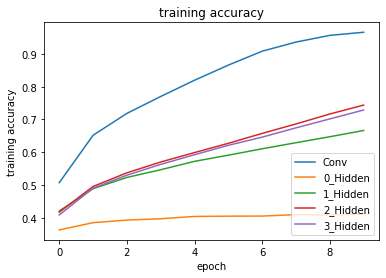

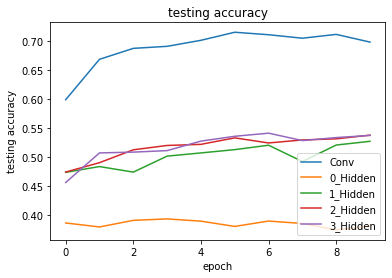

In [ ]:
plt.plot(all_train_accuracies)
plt.plot(all_train_accuracies_0)
plt.plot(all_train_accuracies_1)
plt.plot(all_train_accuracies_2)
plt.plot(all_train_accuracies_3)
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv','0_Hidden', '1_Hidden', '2_Hidden', '3_Hidden'], loc='lower right')
plt.show()

plt.plot(all_test_accuracies)
plt.plot(all_test_accuracies_0)
plt.plot(all_test_accuracies_1)
plt.plot(all_test_accuracies_2)
plt.plot(all_test_accuracies_3)
plt.title('testing accuracy')
plt.ylabel('testing accuracy')
plt.xlabel('epoch')
plt.legend(['Conv','0_Hidden', '1_Hidden', '2_Hidden', '3_Hidden'], loc='lower right')
plt.show()


Explanation:<br>
* As we can see from the training and testing accuracy plots, convolution and pooling layers contribute to the significant increase in the accuracy of the image classification task when added along with fully connected layers in a neural network architecture.

* This can be understood as Convolutions uses filters and do weight sharing and convolve with image data features, and this helps identifying specific edges and information from the image without actually overfitting on the data, as it has sparse interactions and fewer connections compared to fully connected layers. so, our test accuracy is also higher along with train accuracy in this architecture.

* Also, increasing number of fully connected layers increases train accuracy until certain number of layers (here 0 to 2 layers), and then rate of accuracy increase is not significant for additional layers (here 2 to 3), so we can say that we have diminishing rate of train accuracy increase after certain number of layers. Moreover, adding high number of fully connected layers may increase train accuracy as model becomes more expressive but it is not able to generalise well on the test data and our model suffers from overfitting.

* Also model learns its best parameters in about 5 to 6 epochs, as we see there we get highest test accuracy, and after that our model starts overfitting i.e. train accuracy keeps on increasing but we do not get significant improvement in the test accuracy with every successive epochs thereafter.